# Arc Length of Parametric Curves - Tutorial

## Introduction

Is tutorial mein hum seekhenge ki kaise hum ek curve ki length calculate kar sakte hain jo parametric equations se define hoti hai.

Socho ki aapke paas ek curve hai jo vector-valued function se bani hai:
$$\vec{r}(t) = \langle x(t), y(t), z(t) \rangle$$

Jahan $t$ parameter hai jo $a$ se $b$ tak vary karta hai.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.integrate import quad
import ipywidgets as widgets
from IPython.display import display

## Step 1: Ek Simple 2D Curve Example

Chalo start karte hain ek simple 2D parametric curve se:

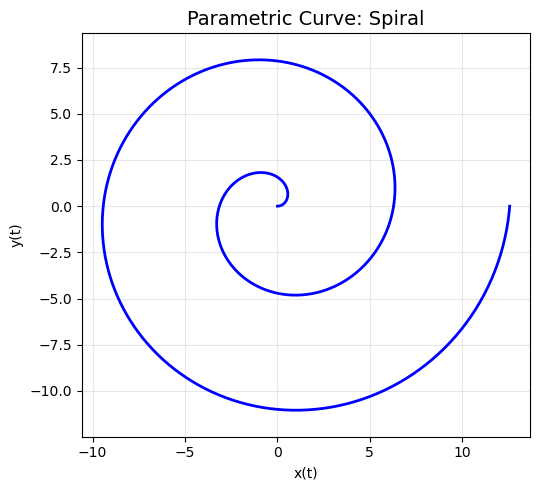

In [3]:
# Define a parametric curve - example: a spiral
def parametric_curve_2d(t):
    x = t * np.cos(t)
    y = t * np.sin(t)
    return x, y

# Generate points for the curve
t = np.linspace(0, 4*np.pi, 1000)
x, y = parametric_curve_2d(t)

# Matplotlib plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y, 'b-', linewidth=2)
plt.title('Parametric Curve: Spiral', fontsize=14)
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Plotly interactive plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Spiral Curve',
                        line=dict(color='blue', width=3)))
fig.update_layout(title='Interactive Parametric Curve',
                  xaxis_title='x(t)', yaxis_title='y(t)',
                  width=600, height=500)

plt.tight_layout()
plt.show()
fig.show()

## Step 2: Curve ko Line Segments se Approximate Karna

Ab hum curve ko straight line segments mein divide karenge. Jitne zyada segments honge, utni better approximation hogi!

In [4]:
def approximate_curve_with_segments(n_segments):
    """
    Curve ko n_segments line segments se approximate karta hai
    """
    # Divide parameter range into n segments
    t_points = np.linspace(0, 4*np.pi, n_segments + 1)
    x_points, y_points = parametric_curve_2d(t_points)
    
    # Calculate total length of line segments
    total_length = 0
    segment_lengths = []
    
    for i in range(n_segments):
        dx = x_points[i+1] - x_points[i]
        dy = y_points[i+1] - y_points[i]
        segment_length = np.sqrt(dx**2 + dy**2)
        segment_lengths.append(segment_length)
        total_length += segment_length
    
    return x_points, y_points, total_length, segment_lengths

# Interactive visualization with different number of segments
def plot_approximation(n_segments):
    # Get approximation
    x_approx, y_approx, approx_length, _ = approximate_curve_with_segments(n_segments)
    
    # Plot both matplotlib and plotly
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Matplotlib View', 'Plotly Interactive View'))
    
    # Original curve
    t_smooth = np.linspace(0, 4*np.pi, 1000)
    x_smooth, y_smooth = parametric_curve_2d(t_smooth)
    
    # Matplotlib plot
    plt.figure(figsize=(12, 5))
    plt.plot(x_smooth, y_smooth, 'b-', linewidth=2, alpha=0.5, label='Original Curve')
    plt.plot(x_approx, y_approx, 'ro-', markersize=6, linewidth=1.5, 
             label=f'Approximation ({n_segments} segments)')
    plt.title(f'Arc Length Approximation\nSegments: {n_segments}, Approx Length: {approx_length:.3f}')
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.show()
    
    # Plotly plot
    fig_plotly = go.Figure()
    fig_plotly.add_trace(go.Scatter(x=x_smooth, y=y_smooth, mode='lines',
                                   name='Original Curve', line=dict(color='blue', width=3)))
    fig_plotly.add_trace(go.Scatter(x=x_approx, y=y_approx, mode='lines+markers',
                                   name=f'Approximation ({n_segments} segments)',
                                   line=dict(color='red', width=2),
                                   marker=dict(size=8)))
    fig_plotly.update_layout(title=f'Approx Length: {approx_length:.3f}',
                            xaxis_title='x(t)', yaxis_title='y(t)',
                            width=700, height=500)
    fig_plotly.show()

# Create interactive widget
segment_slider = widgets.IntSlider(value=6, min=3, max=50, step=1,
                                  description='Segments:',
                                  style={'description_width': 'initial'})
widgets.interact(plot_approximation, n_segments=segment_slider);

interactive(children=(IntSlider(value=6, description='Segments:', max=50, min=3, style=SliderStyle(description…

## Step 3: Arc Length Formula Ka Derivation

Jab hum segments ki number ko infinity tak le jaate hain, to hume exact arc length mil jaati hai:

$$L = \int_a^b \sqrt{\left(\frac{dx}{dt}\right)^2 + \left(\frac{dy}{dt}\right)^2 + \left(\frac{dz}{dt}\right)^2} \, dt$$

Ya vector notation mein:
$$L = \int_a^b ||\vec{r}'(t)|| \, dt$$

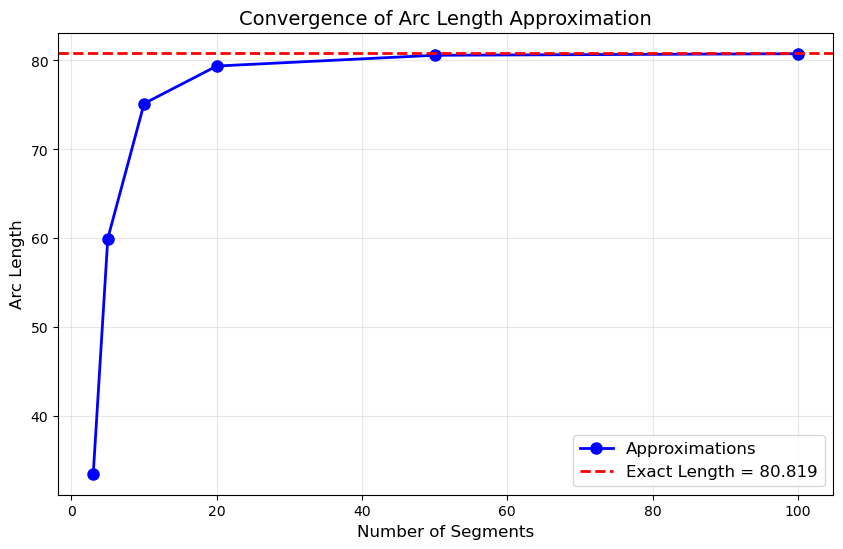

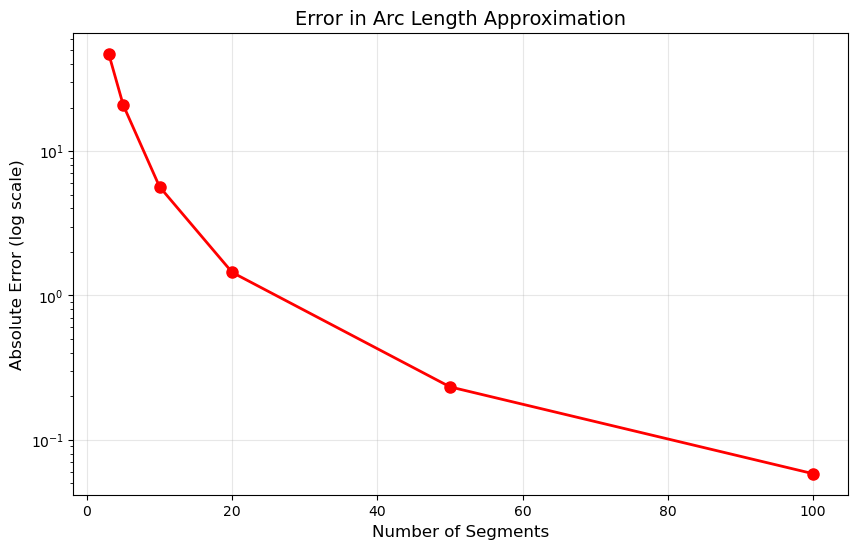

In [5]:
# Visualize how approximation improves with more segments
n_values = [3, 5, 10, 20, 50, 100]
approx_lengths = []

for n in n_values:
    _, _, length, _ = approximate_curve_with_segments(n)
    approx_lengths.append(length)

# Calculate exact arc length using integration
def arc_length_integrand(t):
    # Derivatives of x(t) = t*cos(t) and y(t) = t*sin(t)
    dx_dt = np.cos(t) - t*np.sin(t)
    dy_dt = np.sin(t) + t*np.cos(t)
    return np.sqrt(dx_dt**2 + dy_dt**2)

exact_length, _ = quad(arc_length_integrand, 0, 4*np.pi)

# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(n_values, approx_lengths, 'bo-', markersize=8, linewidth=2, label='Approximations')
plt.axhline(y=exact_length, color='r', linestyle='--', linewidth=2, label=f'Exact Length = {exact_length:.3f}')
plt.xlabel('Number of Segments', fontsize=12)
plt.ylabel('Arc Length', fontsize=12)
plt.title('Convergence of Arc Length Approximation', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Show error reduction
errors = [abs(approx - exact_length) for approx in approx_lengths]
plt.figure(figsize=(10, 6))
plt.semilogy(n_values, errors, 'ro-', markersize=8, linewidth=2)
plt.xlabel('Number of Segments', fontsize=12)
plt.ylabel('Absolute Error (log scale)', fontsize=12)
plt.title('Error in Arc Length Approximation', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

## Step 4: 3D Curve Example

Ab dekhte hain 3D curve ka example - ek helix (spring jaisa shape):

In [ ]:
# Define a 3D parametric curve - helix
def helix_3d(t):
    x = np.cos(t)
    y = np.sin(t)
    z = t / (2 * np.pi)
    return x, y, z

# Interactive 3D visualization with approximation
def plot_3d_approximation(n_segments):
    # Generate smooth curve
    t_smooth = np.linspace(0, 6*np.pi, 1000)
    x_smooth, y_smooth, z_smooth = helix_3d(t_smooth)
    
    # Generate approximation points
    t_approx = np.linspace(0, 6*np.pi, n_segments + 1)
    x_approx, y_approx, z_approx = helix_3d(t_approx)
    
    # Calculate approximation length
    total_length = 0
    for i in range(n_segments):
        dx = x_approx[i+1] - x_approx[i]
        dy = y_approx[i+1] - y_approx[i]
        dz = z_approx[i+1] - z_approx[i]
        total_length += np.sqrt(dx**2 + dy**2 + dz**2)
    
    # Create 3D plot
    fig = go.Figure()
    
    # Original curve
    fig.add_trace(go.Scatter3d(x=x_smooth, y=y_smooth, z=z_smooth,
                              mode='lines', name='Helix',
                              line=dict(color='blue', width=5)))
    
    # Approximation
    fig.add_trace(go.Scatter3d(x=x_approx, y=y_approx, z=z_approx,
                              mode='lines+markers', name=f'Approximation ({n_segments} segments)',
                              line=dict(color='red', width=3),
                              marker=dict(size=5)))
    
    fig.update_layout(title=f'3D Helix - Arc Length ≈ {total_length:.3f}',
                     scene=dict(xaxis_title='x', yaxis_title='y', zaxis_title='z'),
                     width=800, height=600)
    fig.show()

# Interactive widget for 3D
segment_slider_3d = widgets.IntSlider(value=10, min=5, max=50, step=1,
                                     description='Segments:',
                                     style={'description_width': 'initial'})
widgets.interact(plot_3d_approximation, n_segments=segment_slider_3d);

interactive(children=(IntSlider(value=10, description='Segments:', max=50, min=5, style=SliderStyle(descriptio…

## Step 5: Arc Length Formula Implementation

Ab hum ek general function banate hain jo kisi bhi parametric curve ki arc length calculate kar sake:

In [7]:
def calculate_arc_length(x_func, y_func, z_func, a, b):
    """
    Calculate arc length of a parametric curve from t=a to t=b
    
    Parameters:
    x_func, y_func, z_func: functions that return derivatives dx/dt, dy/dt, dz/dt
    a, b: parameter range
    """
    def integrand(t):
        dx_dt = x_func(t)
        dy_dt = y_func(t)
        dz_dt = z_func(t)
        return np.sqrt(dx_dt**2 + dy_dt**2 + dz_dt**2)
    
    length, error = quad(integrand, a, b)
    return length, error

# Example: Calculate arc length of helix
# For helix: x = cos(t), y = sin(t), z = t/(2π)
# Derivatives: dx/dt = -sin(t), dy/dt = cos(t), dz/dt = 1/(2π)

def helix_dx_dt(t):
    return -np.sin(t)

def helix_dy_dt(t):
    return np.cos(t)

def helix_dz_dt(t):
    return 1 / (2 * np.pi)

helix_length, _ = calculate_arc_length(helix_dx_dt, helix_dy_dt, helix_dz_dt, 0, 6*np.pi)
print(f"Helix ki exact arc length (0 to 6π): {helix_length:.4f}")

# Verify with manual calculation
# For helix: arc length = ∫√(sin²t + cos²t + 1/(4π²)) dt = ∫√(1 + 1/(4π²)) dt
manual_length = 6 * np.pi * np.sqrt(1 + 1/(4*np.pi**2))
print(f"Manual calculation se: {manual_length:.4f}")
print(f"Difference: {abs(helix_length - manual_length):.6f}")

Helix ki exact arc length (0 to 6π): 19.0868
Manual calculation se: 19.0868
Difference: 0.000000


## Step 6: Different Curves Ki Arc Length

Chalo kuch aur interesting curves ki arc length calculate karte hain:

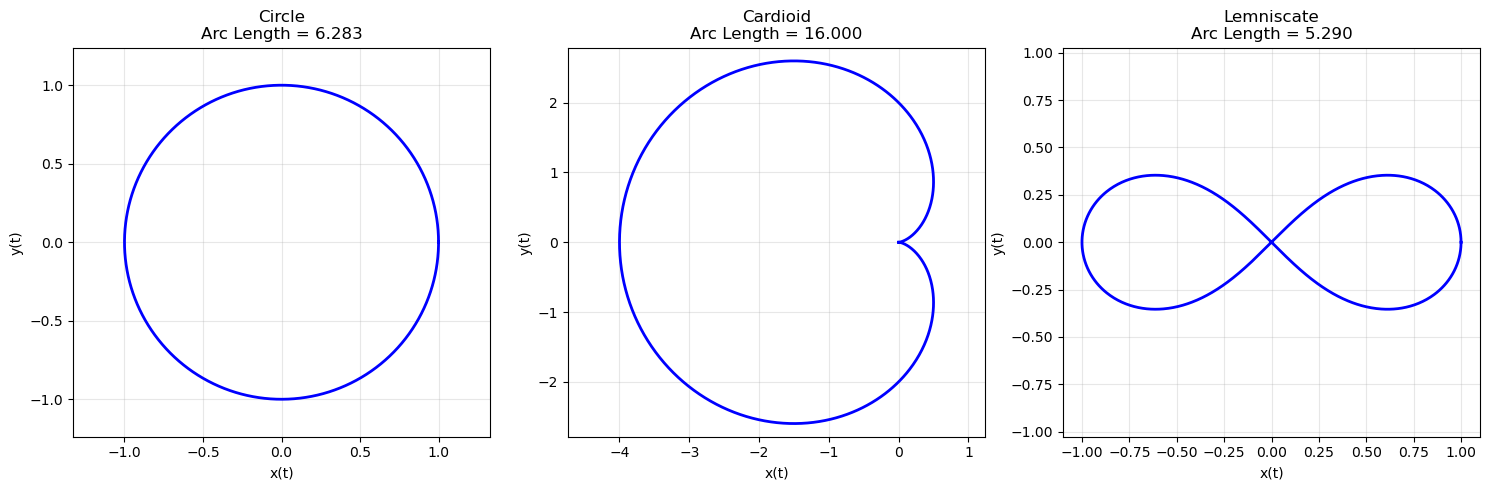

In [8]:
# Different parametric curves
curves = {
    'Circle': {
        'x': lambda t: np.cos(t),
        'y': lambda t: np.sin(t),
        'z': lambda t: 0,
        'dx_dt': lambda t: -np.sin(t),
        'dy_dt': lambda t: np.cos(t),
        'dz_dt': lambda t: 0,
        'range': (0, 2*np.pi)
    },
    'Cardioid': {
        'x': lambda t: 2*(1-np.cos(t))*np.cos(t),
        'y': lambda t: 2*(1-np.cos(t))*np.sin(t),
        'z': lambda t: 0,
        'dx_dt': lambda t: 2*np.sin(t)*(2*np.cos(t)-1),
        'dy_dt': lambda t: 2*(np.cos(t)*(1-np.cos(t)) + np.sin(t)**2),
        'dz_dt': lambda t: 0,
        'range': (0, 2*np.pi)
    },
    'Lemniscate': {
        'x': lambda t: np.cos(t)/(1+np.sin(t)**2),
        'y': lambda t: np.sin(t)*np.cos(t)/(1+np.sin(t)**2),
        'z': lambda t: 0,
        'dx_dt': lambda t: -np.sin(t)*(1+np.sin(t)**2+2*np.cos(t)**2)/(1+np.sin(t)**2)**2,
        'dy_dt': lambda t: (np.cos(t)**2-np.sin(t)**2)*(1+np.sin(t)**2)/(1+np.sin(t)**2)**2,
        'dz_dt': lambda t: 0,
        'range': (0, 2*np.pi)
    }
}

# Plot all curves and calculate their arc lengths
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (name, curve) in enumerate(curves.items()):
    # Generate curve points
    t = np.linspace(curve['range'][0], curve['range'][1], 1000)
    x = curve['x'](t)
    y = curve['y'](t)
    
    # Calculate arc length
    length, _ = calculate_arc_length(curve['dx_dt'], curve['dy_dt'], curve['dz_dt'],
                                    curve['range'][0], curve['range'][1])
    
    # Plot
    axes[idx].plot(x, y, 'b-', linewidth=2)
    axes[idx].set_title(f'{name}\nArc Length = {length:.3f}')
    axes[idx].set_xlabel('x(t)')
    axes[idx].set_ylabel('y(t)')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].axis('equal')

plt.tight_layout()
plt.show()

## Summary

Is tutorial mein humne seekha:

1. **Arc Length ka Concept**: Curve ki actual length kya hoti hai
2. **Approximation Method**: Curve ko straight line segments se approximate karna
3. **Limit Process**: Jaise segments ki number badhti hai, approximation better hoti jaati hai
4. **Arc Length Formula**: 
   $$L = \int_a^b \sqrt{\left(\frac{dx}{dt}\right)^2 + \left(\frac{dy}{dt}\right)^2 + \left(\frac{dz}{dt}\right)^2} \, dt$$
5. **Practical Implementation**: Python mein kaise calculate karte hain

Key Points:
- Arc length hamesha positive hoti hai
- Ye curve ke shape pe depend karti hai, na ki parameterization pe
- Integration required hai, jo kabhi kabhi analytically nahi ho sakti

## Interactive Demo: Design Your Own Curve!

Neeche aap apni curve design kar sakte hain aur uski arc length dekh sakte hain:

In [ ]:
# Interactive curve designer
def interactive_curve_designer(a=1, b=1, c=1, curve_type='spiral'):
    t = np.linspace(0, 4*np.pi, 1000)
    
    if curve_type == 'spiral':
        x = a * t * np.cos(b * t)
        y = a * t * np.sin(b * t)
    elif curve_type == 'rose':
        x = a * np.cos(b * t) * np.cos(t)
        y = a * np.cos(b * t) * np.sin(t)
    elif curve_type == 'lissajous':
        x = a * np.sin(b * t)
        y = a * np.sin(c * t)
    
    # Plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines',
                            line=dict(color='purple', width=3)))
    fig.update_layout(title=f'{curve_type.capitalize()} Curve',
                     xaxis_title='x(t)', yaxis_title='y(t)',
                     width=600, height=600,
                     xaxis=dict(scaleanchor="y", scaleratio=1))
    fig.show()

# Create interactive widgets
a_slider = widgets.FloatSlider(value=1, min=0.1, max=3, step=0.1, description='a:')
b_slider = widgets.FloatSlider(value=1, min=0.1, max=5, step=0.1, description='b:')
c_slider = widgets.FloatSlider(value=1, min=0.1, max=5, step=0.1, description='c:')
curve_dropdown = widgets.Dropdown(options=['spiral', 'rose', 'lissajous'],
                                 value='spiral', description='Curve Type:')

widgets.interact(interactive_curve_designer, a=a_slider, b=b_slider, c=c_slider,
                curve_type=curve_dropdown);

interactive(children=(FloatSlider(value=1.0, description='a:', max=3.0, min=0.1), FloatSlider(value=1.0, descr…